### Importing Libraries

In [314]:
import numpy as np
import pandas as pd
import os  

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns  
# %matplotlib inline
plt.style.use("ggplot")
plt.rc("font", size=14)



In [316]:
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression      
from sklearn import preprocessing                                           
from sklearn.model_selection import train_test_split, cross_val_score      
from sklearn.impute import SimpleImputer                                   

from sklearn.metrics import confusion_matrix                                
from sklearn.metrics import precision_recall_curve                          
from sklearn.metrics import roc_curve                                       
from sklearn.metrics import auc                                             
from sklearn.metrics import log_loss                                        
from sklearn.metrics import roc_auc_score                                   
from sklearn.metrics import classification_report                         

In [317]:
from sklearn import preprocessing 

### Reading data

In [318]:
dfOrdersItems = pd.read_csv('olist_order_items_dataset.csv')

dfOrders = pd.read_csv('olist_orders_dataset.csv')

dforder_payments = pd.read_csv("olist_order_payments_dataset.csv")

dfProducts = pd.read_csv('olist_products_dataset.csv')

dfOrdersReviews = pd.read_csv('olist_order_reviews_dataset.csv')

dfSellers = pd.read_csv('olist_sellers_dataset.csv')

dfCustomers = pd.read_csv('olist_customers_dataset.csv')

dfGeolocation = pd.read_csv('olist_geolocation_dataset.csv')

dfTranslation = pd.read_csv('product_category_name_translation.csv')


In [319]:
dfTranslation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [320]:
dfProducts.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


### Product data

In [321]:
dfProducts = dfProducts.merge(dfTranslation, on='product_category_name')

dfProducts.drop('product_category_name', axis=1, inplace=True)

dfProducts.rename(columns={
    'product_category_name_english' : 'product_category'
}, inplace=True)

dfProducts = dfProducts[['product_id','product_category']]
dfProducts.head()

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumery


In [322]:
len(dfProducts)

32328

In [323]:
dfGeolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [324]:
dfSellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


### Seller data

In [325]:
dfSellerx = pd.merge(dfSellers, dfGeolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfSellerx.rename(columns={
    'geolocation_lat' : 'seller_lat',
    'geolocation_lng' : 'sellet_lng',
}, inplace=True)
dfSellerx = dfSellerx[['seller_id','seller_lat','sellet_lng']]
dfSellerx.head()


,seller_id,seller_lat,sellet_lng
0,3442f8959a84dea7ee197c632cb2df15,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,-22.896154,-47.062431


In [326]:
len(dfSellerx)

435087

In [327]:
dfCustomers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [328]:
dfGeolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


### Customer data

In [329]:
dfCustomerx = pd.merge(dfCustomers, dfGeolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
dfCustomerx.rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng',
}, inplace=True)
dfCustomerx = dfCustomerx[['customer_id','customer_lat','customer_lng']]
dfCustomerx.head()

,customer_id,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,-20.515413,-47.398194


### Merging the data

In [331]:
df_order= pd.merge(dfOrders, dfOrdersItems, on='order_id', how='right')

In [332]:
df_prd= df_order.merge(dfProducts, on='product_id')

In [333]:
df_rev= df_prd.merge(dfOrdersReviews, on='order_id')

In [334]:
df_sel = df_rev.merge(dfSellerx, on='seller_id')

In [335]:
df_sel.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_lat,sellet_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.680114,-46.452454
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,housewares,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,-23.675223,-46.441038


In [336]:
len(df_sel)

16144263

In [337]:
len(dfCustomerx)

15083455

In [338]:
df_sel = df_sel[:161442]
print(len(df_sel))

161442


In [339]:
dfCustomerx = dfCustomerx[:150834]
print(len(dfCustomerx))

150834


In [340]:
df_cus = df_sel.merge(dfCustomerx, on='customer_id')

In [341]:
df = df_cus.rename(columns={'price':'product_price','order_item_id':'quantity'})

In [342]:
df = df.drop(['review_id', 'review_creation_date','review_answer_timestamp','review_comment_title','review_comment_message','customer_id',], axis=1)
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'quantity', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_price', 'freight_value', 'product_category', 'review_score',
       'seller_lat', 'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

In [343]:
len(df)

118150

In [344]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,product_id,seller_id,shipping_limit_date,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.947654,-43.338606
1,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.937662,-43.332860
2,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.942264,-43.332343
3,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.950595,-43.335693
4,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.941005,-43.339955


In [345]:
df.describe()

,quantity,product_price,freight_value,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
count,118150.0,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000
mean,1.0,188.108345,9.975036,3.779856,-21.363502,-48.229601,-23.083842,-46.124553
std,0.0,37.187817,7.052532,1.311448,0.006742,0.007339,0.400970,2.044609
min,1.0,146.000000,0.000000,2.000000,-21.396342,-48.245580,-23.735663,-48.806225
25%,1.0,151.900000,0.000000,2.000000,-21.368331,-48.234968,-23.702918,-47.148067
50%,1.0,199.000000,12.520000,5.000000,-21.364020,-48.228831,-22.949633,-46.546756
75%,1.0,240.000000,13.180000,5.000000,-21.359286,-48.223943,-22.939784,-43.337237
max,1.0,240.000000,17.970000,5.000000,-21.348961,-48.216215,-22.598655,-43.324086


In [346]:
# df.to_csv("data.csv")

### Filtering

In [347]:
df = df[df['order_status'] == 'delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,quantity,product_id,seller_id,shipping_limit_date,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.947654,-43.338606
1,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.937662,-43.332860
2,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.942264,-43.332343
3,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.950595,-43.335693
4,577b745a85120419fe27073e3c9e1a76,delivered,2018-04-26 21:57:27,2018-04-27 13:30:54,2018-04-28 07:58:00,2018-05-07 13:22:01,2018-06-08 00:00:00,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 13:30:47,199.0,0.0,watches_gifts,5,-21.362358,-48.232976,-22.941005,-43.339955


In [348]:
df['product_category'].unique() 

array(['watches_gifts', 'health_beauty'], dtype=object)

In [349]:
 # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['product_category']= label_encoder.fit_transform(df['product_category']) 
  
df['product_category'].unique() 

array([1, 0])

In [350]:
df.to_csv("data.csv")

In [351]:
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'quantity', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_price', 'freight_value', 'product_category', 'review_score',
       'seller_lat', 'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

### Checking Correlation 

In [352]:
corr = df.corr()

In [353]:
corr['review_score']

quantity                     NaN
product_price      -4.821013e-01
freight_value      -6.567914e-01
product_category    7.963432e-01
review_score        1.000000e+00
seller_lat         -4.185521e-16
sellet_lng         -1.313071e-15
customer_lat        8.477753e-01
customer_lng        2.914523e-01
Name: review_score, dtype: float64

In [354]:
corr['product_price']

quantity                     NaN
product_price       1.000000e+00
freight_value      -3.003653e-01
product_category   -8.187728e-01
review_score       -4.821013e-01
seller_lat         -2.106510e-15
sellet_lng          2.405542e-15
customer_lat       -8.729833e-01
customer_lng        4.625602e-01
Name: product_price, dtype: float64

In [355]:
corr['product_category']

quantity                     NaN
product_price      -8.187728e-01
freight_value      -2.666519e-01
product_category    1.000000e+00
review_score        7.963432e-01
seller_lat          2.095127e-15
sellet_lng          1.077235e-15
customer_lat        9.426303e-01
customer_lng        1.200434e-01
Name: product_category, dtype: float64

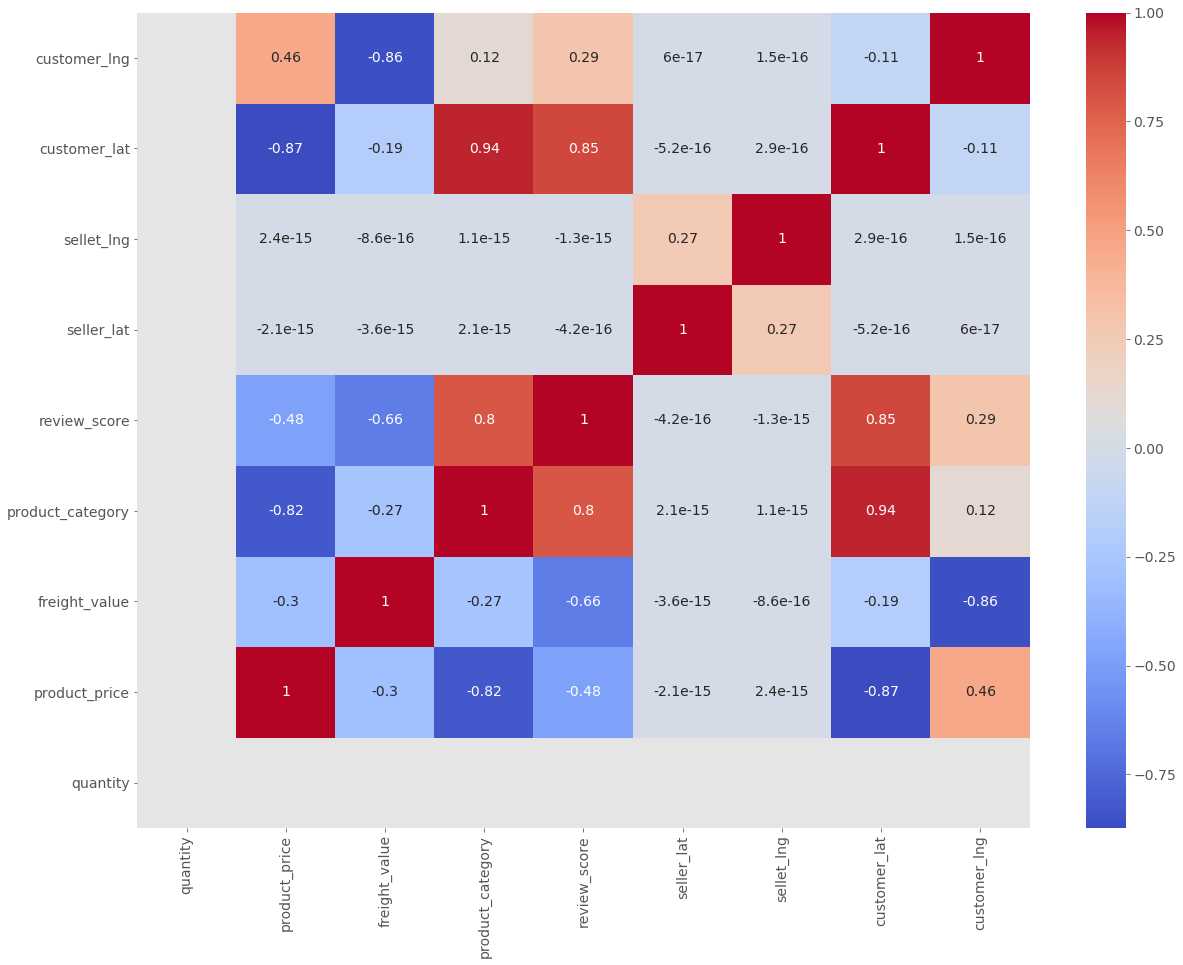

In [356]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

## Data Pre-Processing

### Checking null values

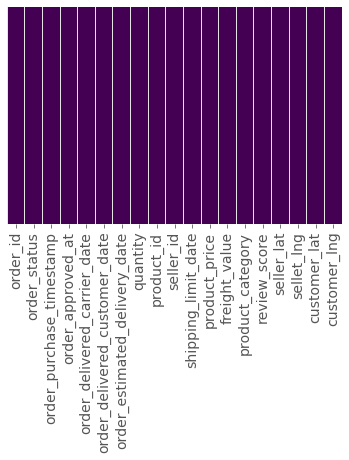

In [357]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118150 entries, 0 to 118149
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118150 non-null  object 
 1   order_status                   118150 non-null  object 
 2   order_purchase_timestamp       118150 non-null  object 
 3   order_approved_at              118150 non-null  object 
 4   order_delivered_carrier_date   118150 non-null  object 
 5   order_delivered_customer_date  118150 non-null  object 
 6   order_estimated_delivery_date  118150 non-null  object 
 7   quantity                       118150 non-null  int64  
 8   product_id                     118150 non-null  object 
 9   seller_id                      118150 non-null  object 
 10  shipping_limit_date            118150 non-null  object 
 11  product_price                  118150 non-null  float64
 12  freight_value                 

### Dropping some columns

In [359]:
new_df = df.drop(["shipping_limit_date","order_estimated_delivery_date","order_delivered_customer_date","order_delivered_carrier_date","order_approved_at","order_purchase_timestamp"],axis=1)

In [360]:
new_df.head()

,order_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,577b745a85120419fe27073e3c9e1a76,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.947654,-43.338606
1,577b745a85120419fe27073e3c9e1a76,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.937662,-43.332860
2,577b745a85120419fe27073e3c9e1a76,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.942264,-43.332343
3,577b745a85120419fe27073e3c9e1a76,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.950595,-43.335693
4,577b745a85120419fe27073e3c9e1a76,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.941005,-43.339955


In [361]:
len(new_df)

118150

### Label encodings for some columns

In [362]:
new_df['order_id'].unique() 

array(['577b745a85120419fe27073e3c9e1a76',
       'e885304ec221dd09a24101f0dd920504',
       'b2d88e5f45a8f1f5215146eeb66d49c7',
       '8dcedca18bb1b1f7a5db3ebb636f372e'], dtype=object)

In [363]:
 # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
new_df['order_id']= label_encoder.fit_transform(new_df['order_id']) 
  
new_df['order_id'].unique() 

array([0, 3, 2, 1])

In [364]:
new_df.head(2)

,order_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,0,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.947654,-43.338606
1,0,delivered,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.937662,-43.332860


In [365]:
new_df['product_id'].unique() 

array(['7a10781637204d8d10485c71a6108a2e',
       'e0d64dcfaa3b6db5c54ca298ae101d05',
       '461f43be3bdf8844e65b62d9ac2c7a5a',
       'bc74f63361c15c1a5baa5b97ac432e62'], dtype=object)

In [366]:
 # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
new_df['product_id']= label_encoder.fit_transform(new_df['product_id']) 
  
new_df['product_id'].unique() 

array([1, 3, 0, 2])

In [367]:
new_df.head(2)

,order_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,0,delivered,1,1,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.947654,-43.338606
1,0,delivered,1,1,4869f7a5dfa277a7dca6462dcf3b52b2,199.0,0.0,1,5,-21.362358,-48.232976,-22.937662,-43.332860


In [368]:
new_df['seller_id'].unique() 

array(['4869f7a5dfa277a7dca6462dcf3b52b2'], dtype=object)

In [369]:
 # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
new_df['seller_id']= label_encoder.fit_transform(new_df['seller_id']) 
  
new_df['seller_id'].unique() 

array([0])

In [370]:
new_df['order_status'].unique() 

array(['delivered'], dtype=object)

In [371]:
 # label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
new_df['order_status']= label_encoder.fit_transform(new_df['order_status']) 
  
new_df['order_status'].unique() 

array([0])

In [372]:
new_df.head()

,order_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
0,0,0,1,1,0,199.0,0.0,1,5,-21.362358,-48.232976,-22.947654,-43.338606
1,0,0,1,1,0,199.0,0.0,1,5,-21.362358,-48.232976,-22.937662,-43.332860
2,0,0,1,1,0,199.0,0.0,1,5,-21.362358,-48.232976,-22.942264,-43.332343
3,0,0,1,1,0,199.0,0.0,1,5,-21.362358,-48.232976,-22.950595,-43.335693
4,0,0,1,1,0,199.0,0.0,1,5,-21.362358,-48.232976,-22.941005,-43.339955


In [373]:
len(new_df)

118150

In [374]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118150 entries, 0 to 118149
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          118150 non-null  int32  
 1   order_status      118150 non-null  int32  
 2   quantity          118150 non-null  int64  
 3   product_id        118150 non-null  int32  
 4   seller_id         118150 non-null  int32  
 5   product_price     118150 non-null  float64
 6   freight_value     118150 non-null  float64
 7   product_category  118150 non-null  int32  
 8   review_score      118150 non-null  int64  
 9   seller_lat        118150 non-null  float64
 10  sellet_lng        118150 non-null  float64
 11  customer_lat      118150 non-null  float64
 12  customer_lng      118150 non-null  float64
dtypes: float64(6), int32(5), int64(2)
memory usage: 10.4 MB


In [375]:
new_df.describe()

,order_id,order_status,quantity,product_id,seller_id,product_price,freight_value,product_category,review_score,seller_lat,sellet_lng,customer_lat,customer_lng
count,118150.000000,118150.0,118150.0,118150.000000,118150.0,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000,118150.000000
mean,1.339568,0.0,1.0,1.505036,0.0,188.108345,9.975036,0.743885,3.779856,-21.363502,-48.229601,-23.083842,-46.124553
std,1.142929,0.0,0.0,1.052396,0.0,37.187817,7.052532,0.436488,1.311448,0.006742,0.007339,0.400970,2.044609
min,0.000000,0.0,1.0,0.000000,0.0,146.000000,0.000000,0.000000,2.000000,-21.396342,-48.245580,-23.735663,-48.806225
25%,0.000000,0.0,1.0,1.000000,0.0,151.900000,0.000000,0.000000,2.000000,-21.368331,-48.234968,-23.702918,-47.148067
50%,1.000000,0.0,1.0,1.000000,0.0,199.000000,12.520000,1.000000,5.000000,-21.364020,-48.228831,-22.949633,-46.546756
75%,2.000000,0.0,1.0,2.000000,0.0,240.000000,13.180000,1.000000,5.000000,-21.359286,-48.223943,-22.939784,-43.337237
max,3.000000,0.0,1.0,3.000000,0.0,240.000000,17.970000,1.000000,5.000000,-21.348961,-48.216215,-22.598655,-43.324086


In [376]:
new_df.columns

Index(['order_id', 'order_status', 'quantity', 'product_id', 'seller_id',
       'product_price', 'freight_value', 'product_category', 'review_score',
       'seller_lat', 'sellet_lng', 'customer_lat', 'customer_lng'],
      dtype='object')

### Outlier Checking And Handling

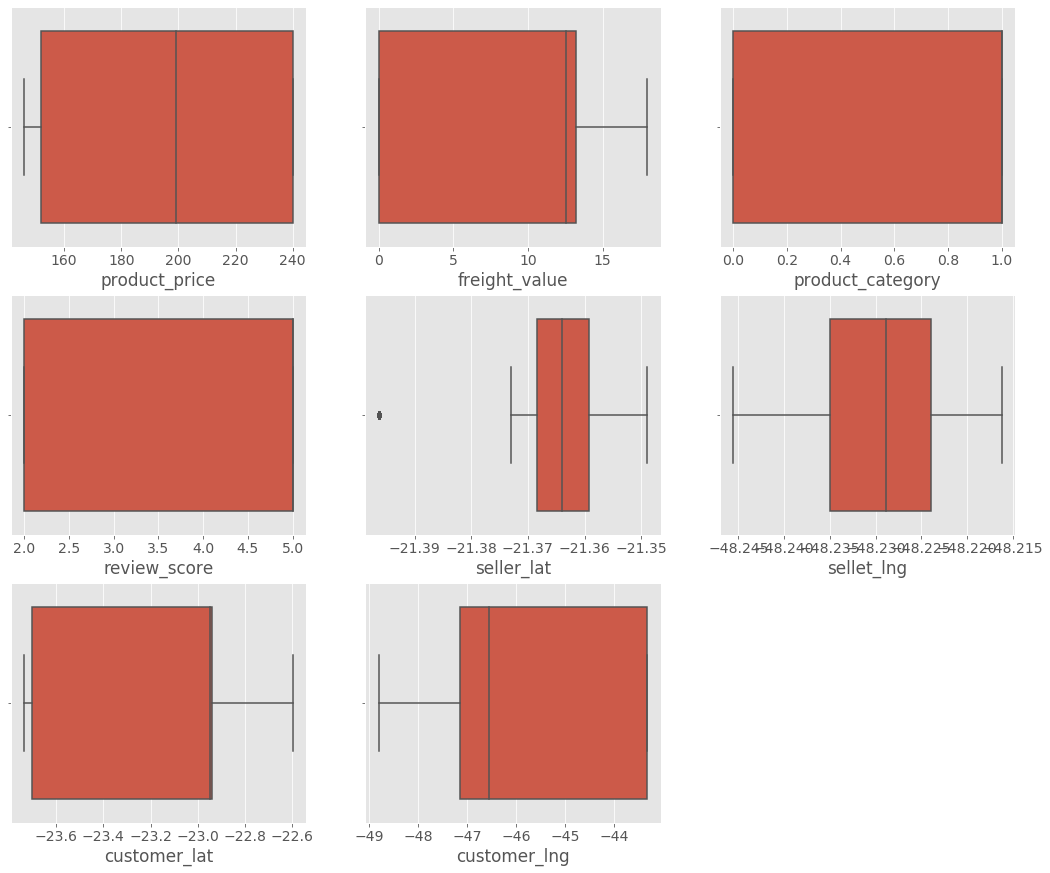

In [377]:
fig = plt.figure(figsize = (18,15))
for i, item in enumerate (new_df.drop(['order_id', 'order_status', 'quantity', 'product_id', 'seller_id'],axis=1)):
    plt.subplot(3,3,i+1)
    sns.boxplot(new_df[item])

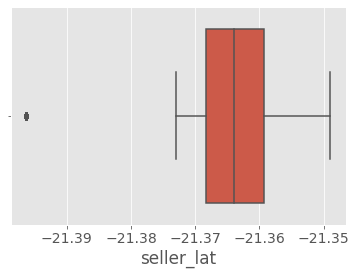

In [378]:
sns.boxplot(new_df['seller_lat'])

In [379]:
Q1 =  new_df['seller_lat'].quantile(0.25)
Q3 = new_df['seller_lat'].quantile(0.75)
IQR = Q3 - Q1

In [380]:
outliers_df =new_df[(new_df['seller_lat'] < Q1-1.5*IQR ) | (new_df['seller_lat'] > Q3+1.5*IQR)]['seller_lat']
print(outliers_df)

36792    -21.396342
36793    -21.396342
36794    -21.396342
36795    -21.396342
36796    -21.396342
            ...    
117967   -21.396342
117968   -21.396342
117969   -21.396342
117970   -21.396342
117971   -21.396342
Name: seller_lat, Length: 695, dtype: float64


In [381]:
for i in range(len(outliers_df)):
    new_df['seller_lat'][outliers_df.index[i]]  = new_df.seller_lat.median()
print(new_df['seller_lat'][outliers_df.index])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


36792    -21.364020
36793    -21.363997
36794    -21.363986
36795    -21.363980
36796    -21.363977
            ...    
117967   -21.363974
117968   -21.363974
117969   -21.363974
117970   -21.363974
117971   -21.363974
Name: seller_lat, Length: 695, dtype: float64


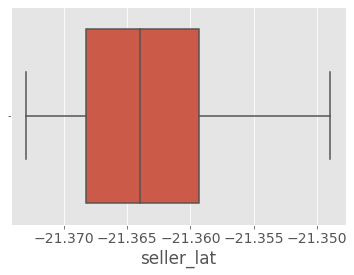

In [382]:
sns.boxplot(new_df['seller_lat'])

In [383]:
new_df.to_csv("update_data.csv")

### Checking Correlation After Data Pre-Processing

In [384]:
new_corr = new_df.corr()

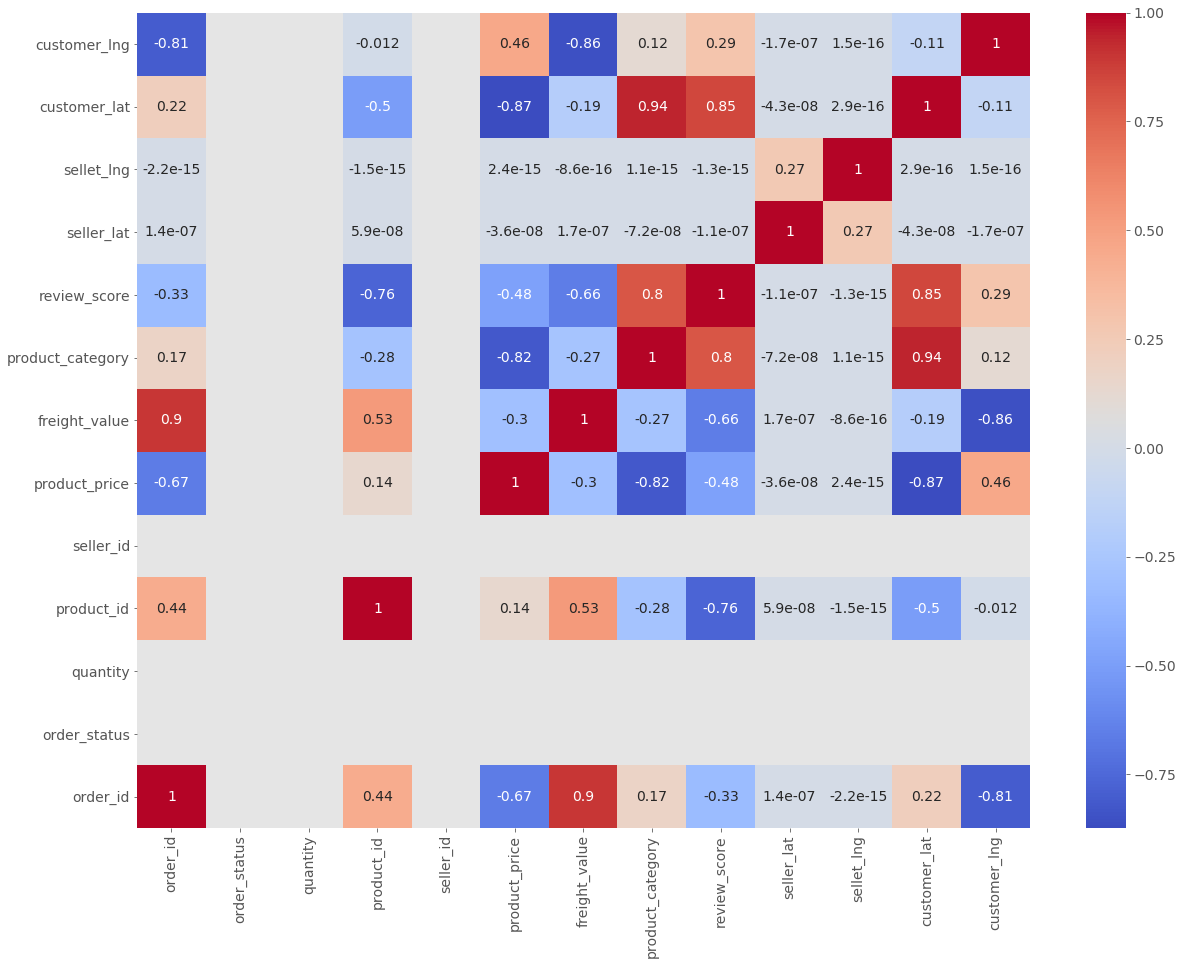

In [385]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(new_corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

In [386]:
new_df = new_df.drop(['order_status','quantity','seller_id'],axis=1)

In [387]:
new_corr = new_df.corr()

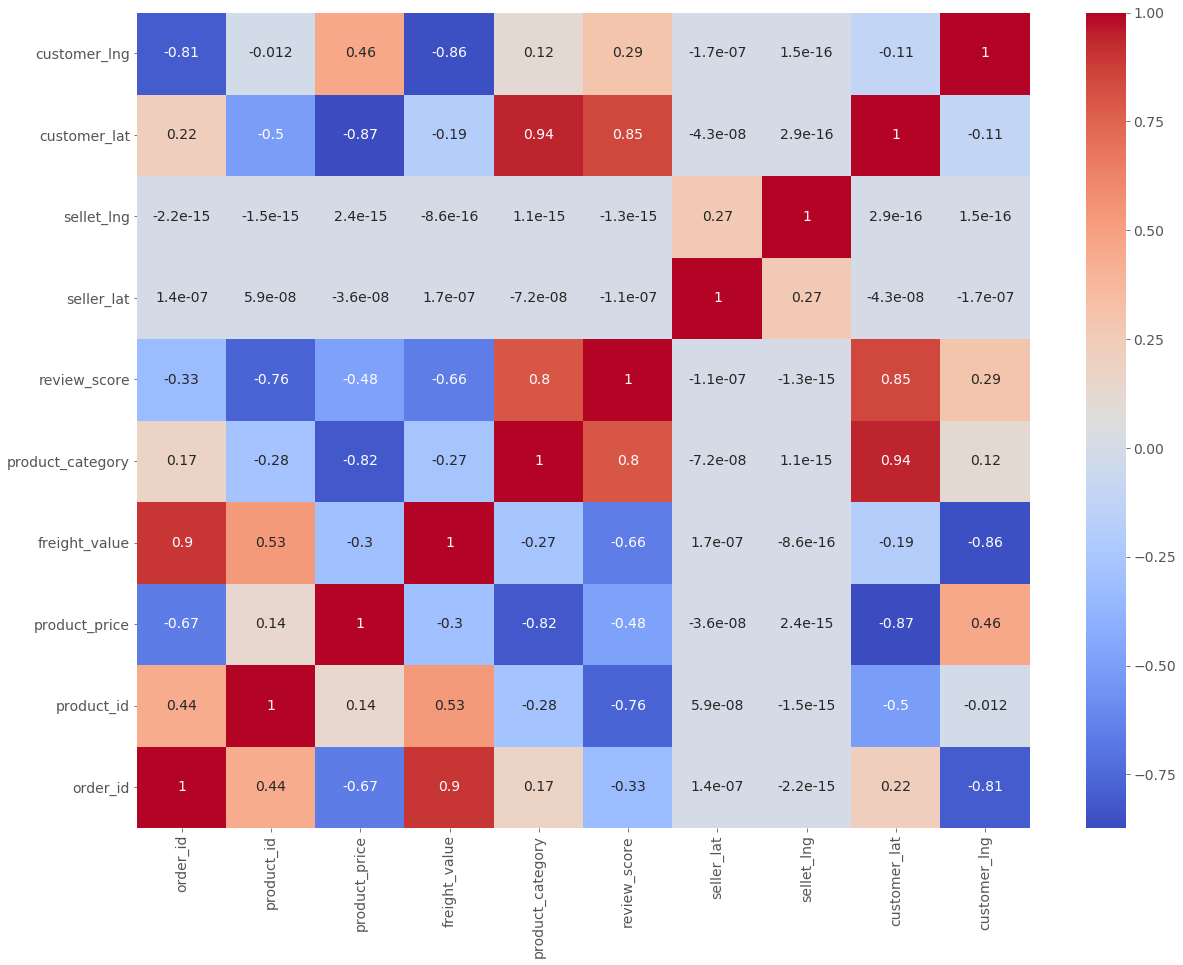

In [388]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(new_corr,cmap='coolwarm', annot = True)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

In [389]:
new_df.to_csv("update_data.csv")

### Splitting Data After Cleaning

#### Model 1 for Predicting 'review_score'

In [390]:
from sklearn.model_selection import train_test_split

In [391]:
new_df.columns

Index(['order_id', 'product_id', 'product_price', 'freight_value',
       'product_category', 'review_score', 'seller_lat', 'sellet_lng',
       'customer_lat', 'customer_lng'],
      dtype='object')

In [392]:
X1 = new_df.drop(['review_score','product_category','product_price'], axis=1)
y1 = new_df['review_score']

In [393]:
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(
    X1,
    y1,
    test_size = .1
)

In [394]:
print(len(X1),len(y1))

118150 118150


In [395]:
print(len(xTrain1),len(yTrain1),len(xTest1),len(yTest1))

106335 106335 11815 11815


In [396]:
xTrain1.columns

Index(['order_id', 'product_id', 'freight_value', 'seller_lat', 'sellet_lng',
       'customer_lat', 'customer_lng'],
      dtype='object')

In [397]:
yTrain1

116421    2
74041     5
29231     5
64128     5
83815     5
         ..
111417    2
20890     5
113519    2
40919     3
54418     3
Name: review_score, Length: 106335, dtype: int64

### Decision Tree Model

In [398]:
from sklearn import tree 

In [399]:
import seaborn as sns

In [400]:
model1 = tree.DecisionTreeClassifier()
model1.fit(xTrain1,yTrain1)
print('model score =',model1.score(xTrain1,yTrain1))

model score = 1.0


#### Testing Accuracy

In [401]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [402]:
prediction1 = model1.predict(xTest1)
print('accuracy =',accuracy_score(yTest1, prediction1)*100,'%')

accuracy = 100.0 %


In [403]:
results1 = confusion_matrix(yTest1, prediction1)
accuracy=accuracy_score(yTest1, prediction1)
report=classification_report(yTest1, prediction1) 
print("Confusion Matrix: ",results1)
print('Model Accuracy: ',accuracy)
print('\n')
print(report)

Confusion Matrix:  [[2998    0    0]
 [   0 2667    0]
 [   0    0 6150]]
Model Accuracy:  1.0


              precision    recall  f1-score   support

           2       1.00      1.00      1.00      2998
           3       1.00      1.00      1.00      2667
           5       1.00      1.00      1.00      6150

   micro avg       1.00      1.00      1.00     11815
   macro avg       1.00      1.00      1.00     11815
weighted avg       1.00      1.00      1.00     11815



In [404]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2998    0    0]
 [   0 2667    0]
 [   0    0 6150]]


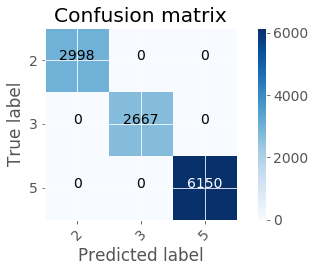

In [405]:
cnf_matrix = confusion_matrix(yTest1, prediction1,labels=[2, 3, 5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['2', '3', '5'],
                      title='Confusion matrix')

#### Model 1 for Predicting 'product_category'

In [406]:
X2 = new_df.drop(['review_score','product_category','product_price'], axis=1)
y2 = new_df['product_category']

In [407]:
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(
    X2,
    y2,
    test_size = .1
)

In [408]:
print(len(X2),len(y2))

118150 118150


In [409]:
print(len(xTrain2),len(yTrain2),len(xTest2),len(yTest2))

106335 106335 11815 11815


In [410]:
xTrain2.columns

Index(['order_id', 'product_id', 'freight_value', 'seller_lat', 'sellet_lng',
       'customer_lat', 'customer_lng'],
      dtype='object')

In [411]:
yTrain2

25542     1
52912     1
25479     1
28330     1
38403     1
         ..
18188     1
102813    0
24520     1
68360     1
109765    0
Name: product_category, Length: 106335, dtype: int32

In [412]:
model2 = tree.DecisionTreeClassifier()
model2.fit(xTrain2,yTrain2)
print('model score =',model2.score(xTrain2,yTrain2))

model score = 1.0


### Testing accuracy

In [413]:
prediction2 = model2.predict(xTest2)
print('accuracy =',accuracy_score(yTest2, prediction2)*100,'%')

accuracy = 100.0 %


In [414]:
results = confusion_matrix(yTest2, prediction2)
accuracy=accuracy_score(yTest2, prediction2)
report=classification_report(yTest2, prediction2) 
print(results)
print('Model Accuracy: ',accuracy)
print('\n')
print(report)

[[3028    0]
 [   0 8787]]
Model Accuracy:  1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3028
           1       1.00      1.00      1.00      8787

   micro avg       1.00      1.00      1.00     11815
   macro avg       1.00      1.00      1.00     11815
weighted avg       1.00      1.00      1.00     11815



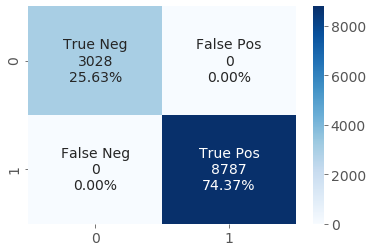

In [415]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt="", cmap='Blues')

#### Model 1 for Predicting 'product_price'

In [416]:
X3 = new_df.drop(['review_score','product_category','product_price'], axis=1)
y3 = new_df['product_price']

In [417]:
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(
    X3,
    y3,
    test_size = .1
)

In [418]:
print(len(X3),len(y3))

118150 118150


In [419]:
print(len(xTrain3),len(yTrain3),len(xTest3),len(yTest3))

106335 106335 11815 11815


In [420]:
xTrain3.columns

Index(['order_id', 'product_id', 'freight_value', 'seller_lat', 'sellet_lng',
       'customer_lat', 'customer_lng'],
      dtype='object')

In [421]:
yTrain3

43078     151.9
56018     151.9
113911    240.0
76765     146.0
14255     199.0
          ...  
100442    240.0
81265     146.0
76326     146.0
99569     240.0
21150     199.0
Name: product_price, Length: 106335, dtype: float64

In [422]:
# model3 = tree.DecisionTreeClassifier()
# model3.fit(xTrain3,yTrain3)
# print('model score =',model3.score(xTrain3,yTrain3))

In [423]:
import tensorflow as tf

In [424]:
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(10,input_dim=7,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(10,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(6,kernel_initializer="normal",activation="relu"),
tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])

In [425]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


In [426]:
model.fit(xTrain3,yTrain3,epochs=3)

Train on 106335 samples
Epoch 1/3
106335/106335 [==============================] - 15s 142us/sample - loss: 2327.8506 - mse: 2327.8472
Epoch 2/3
106335/106335 [==============================] - 12s 115us/sample - loss: 96.3743 - mse: 96.3737
Epoch 3/3
106335/106335 [==============================] - 10s 96us/sample - loss: 0.0023 - mse: 0.0023


In [427]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(xTest3, yTest3)
print("test loss, test mse:", results)

Evaluate on test data
11815/11815 [==============================] - 1s 85us/sample - loss: 0.0033 - mse: 0.0033
test loss, test acc: [0.0033033616394293266, 0.0033033597]


In [428]:
print("Generate predictions for 3 samples")
predictions3 = model.predict(xTest3[:3])
print("predictions shape:", predictions3.shape)

Generate predictions for 3 samples
predictions shape: (3, 1)


In [433]:
yTest3_pred = model.predict(xTest3)

In [434]:
print(len(yTest3),len(yTest3_pred))

11815 11815


In [435]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(yTest3, yTest3_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(yTest3, yTest3_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(yTest3, yTest3_pred), 2)) 
print("R2 score =", round(sm.r2_score(yTest3, yTest3_pred), 2))

Mean absolute error = 0.05
Mean squared error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [429]:
print(predictions3)

[[199.02]
 [199.  ]
 [239.94]]


In [430]:
print(yTest3[:3])

20492     199.0
14347     199.0
110389    240.0
Name: product_price, dtype: float64


In [431]:
print(xTest3[:3])

        order_id  product_id  freight_value  seller_lat  sellet_lng  \
20492          0           1           0.00  -21.369332  -48.225907   
14347          0           1           0.00  -21.370439  -48.233463   
110389         1           2          13.18  -21.372817  -48.218548   

        customer_lat  customer_lng  
20492     -22.950129    -43.336057  
14347     -22.947452    -43.332513  
110389    -23.725600    -46.544829  


In [445]:
print(xTest3[:1],type(xTest3[:1]))

       order_id  product_id  freight_value  seller_lat  sellet_lng  \
20492         0           1            0.0  -21.369332  -48.225907   

       customer_lat  customer_lng  
20492    -22.950129    -43.336057   <class 'pandas.core.frame.DataFrame'>


In [456]:
print(yTest3[:1],yTest2[:1],yTest1[:1])

20492    199.0
Name: product_price, dtype: float64 12441    1
Name: product_category, dtype: int32 19302    5
Name: review_score, dtype: int64


In [436]:
import h5py,pickle

In [438]:
model.save("NN_model.h5")

In [439]:
pickle_out=open("model1.pickle","wb")
pickle.dump(model1,pickle_out)
pickle_out.close()

pickle_out=open("model2.pickle","wb")
pickle.dump(model2,pickle_out)
pickle_out.close()

In [469]:
def get_predictions(order_id, product_id, freight_value, seller_lat, sellet_lng,
       customer_lat, customer_lng):
    df = pd.DataFrame(columns=['order_id', 'product_id', 'freight_value', 'seller_lat', 'sellet_lng',
       'customer_lat', 'customer_lng'])
    
    df.loc[0,'order_id'] = order_id
    df.loc[0,'product_id'] = product_id
    df.loc[0,'freight_value'] = freight_value
    df.loc[0,'seller_lat'] = seller_lat
    df.loc[0,'sellet_lng'] = sellet_lng
    df.loc[0,'customer_lat'] = customer_lat
    df.loc[0,'customer_lng'] = customer_lng
    
    
    product_price = model.predict(df[:1])[0]
    product_category = model2.predict(df[:1])
    review_score = model1.predict(df[:1])
    
    return product_price[0],product_category[0],review_score[0]
    

In [470]:
# 0           1            0.0  -21.369332  -48.225907 -22.950129    -43.336057

In [471]:
product_price,product_category,review_score = get_predictions(0, 1, 0.0, -21.369332, -48.225907,
       -22.950129, -43.336057)

In [472]:
print("Product Price: ",product_price)
print("Product Category: ",product_category)
print("Review Score: ",review_score)

Product Price:  199.01767
Product Category:  1
Review Score:  5
